# Imports

In [1]:
%reload_ext autoreload
%autoreload 2

import pickle
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


from statannotations.Annotator import Annotator
from matplotlib.gridspec import GridSpecFromSubplotSpec
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
%run functions.py
%run ../../setup_project.py
%run ../../generic_plot_functions.py

In [3]:
projectName, dataPath, dlcModelPath, myProject, sSessions = setup_project_session_lists(projectName="autopi_mec",dataPath=PROJECT_DATA_PATH,dlcModelPath="")

creating myProject, an autopipy.project object
Project name: autopi_mec
dataPath: /ext_drives/d91/data/projects/jingjie/Peng_et.al_2025_noInt/
dlcModelPath: 
Reading /ext_drives/d91/data/projects/jingjie/Peng_et.al_2025_noInt//sessionList
We have 180 testing sessions in the list
spikeA.Kilosort_session objects are in sSessions


# Load data

In [4]:
fn = myProject.dataPath + '/results/behavior_180_EastReferenceQuadrant.csv'
res = pd.read_csv(fn)

In [5]:
res = res[res.valid]

In [6]:
#Get split the trials into long search path and short search path trials
for s in tqdm(res.sessionName.unique()):
    for l in res.light.unique():
        for t in res[(res.light == l)&(res.sessionName == s)].trialNo.unique():

            trial_searchPath = res[(res.light == l)&(res.sessionName == s)&(res.trialNo == t)]['searchLength'].values
            searchLengthMedian = np.nanmedian(res[(res.light == l)&(res.sessionName == s)]['searchLength'])

            if trial_searchPath <= searchLengthMedian:
                res.loc[(res.light == l)&(res.sessionName == s)&(res.trialNo == t),'searchPathSorL'] = 'shortPath'
            else:
                res.loc[(res.light == l)&(res.sessionName == s)&(res.trialNo == t),'searchPathSorL']= 'longPath'

100%|██████████| 180/180 [01:38<00:00,  1.83it/s]


In [7]:
#Get the instantanous variables
fn = myProject.dataPath + '/results/instan_behavior_180_EastReference.csv'
instanDf = pd.read_csv(fn)
instanDf['sessionName'] = instanDf['name'].apply(lambda x: x.split('_')[0])
instanDf['mouse'] = instanDf['name'].apply(lambda x: x.split('-')[0])
instanDf['condition'] = instanDf['name'].apply(lambda x: x.split('_')[2])
instanDf['distanceFromCenter'] = np.sqrt(instanDf.x**2 + instanDf.y**2)

In [ ]:
res['homingLeftRight'] = np.where(res['startPositionHoming_x']<0,'left','right')

In [ ]:
mergedDf = res.merge(instanDf,left_on= ['sessionName','trialNo'],right_on=['sessionName','trialNo'], how = 'left')

In [ ]:
import gc
# Clean up memory
del instanDf
gc.collect()

In [ ]:
#Convert Radian to degrees
degrees = np.degrees(res['homingErrorAtPeripheryLeverAbsolute'])
res['homingErrorAtPeripheryLeverAbsoluteDegrees'] = degrees

# Ext_Fig_2

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Light vs. Dark: Wilcoxon test (paired samples), P_val:1.526e-05 Stat=0.000e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Light vs. Dark: Wilcoxon test (paired samples), P_val:1.526e-05 Stat=0.000e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Dark_Short search vs. Dark_Long search: Wilcoxon test (paired samples), P_val:2.136e-04 Stat=6.000e+00
Light_Short search vs. Light_Long search: Wilcoxon test (paired samples), P_val:1.526e-05 Stat=0.000e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e

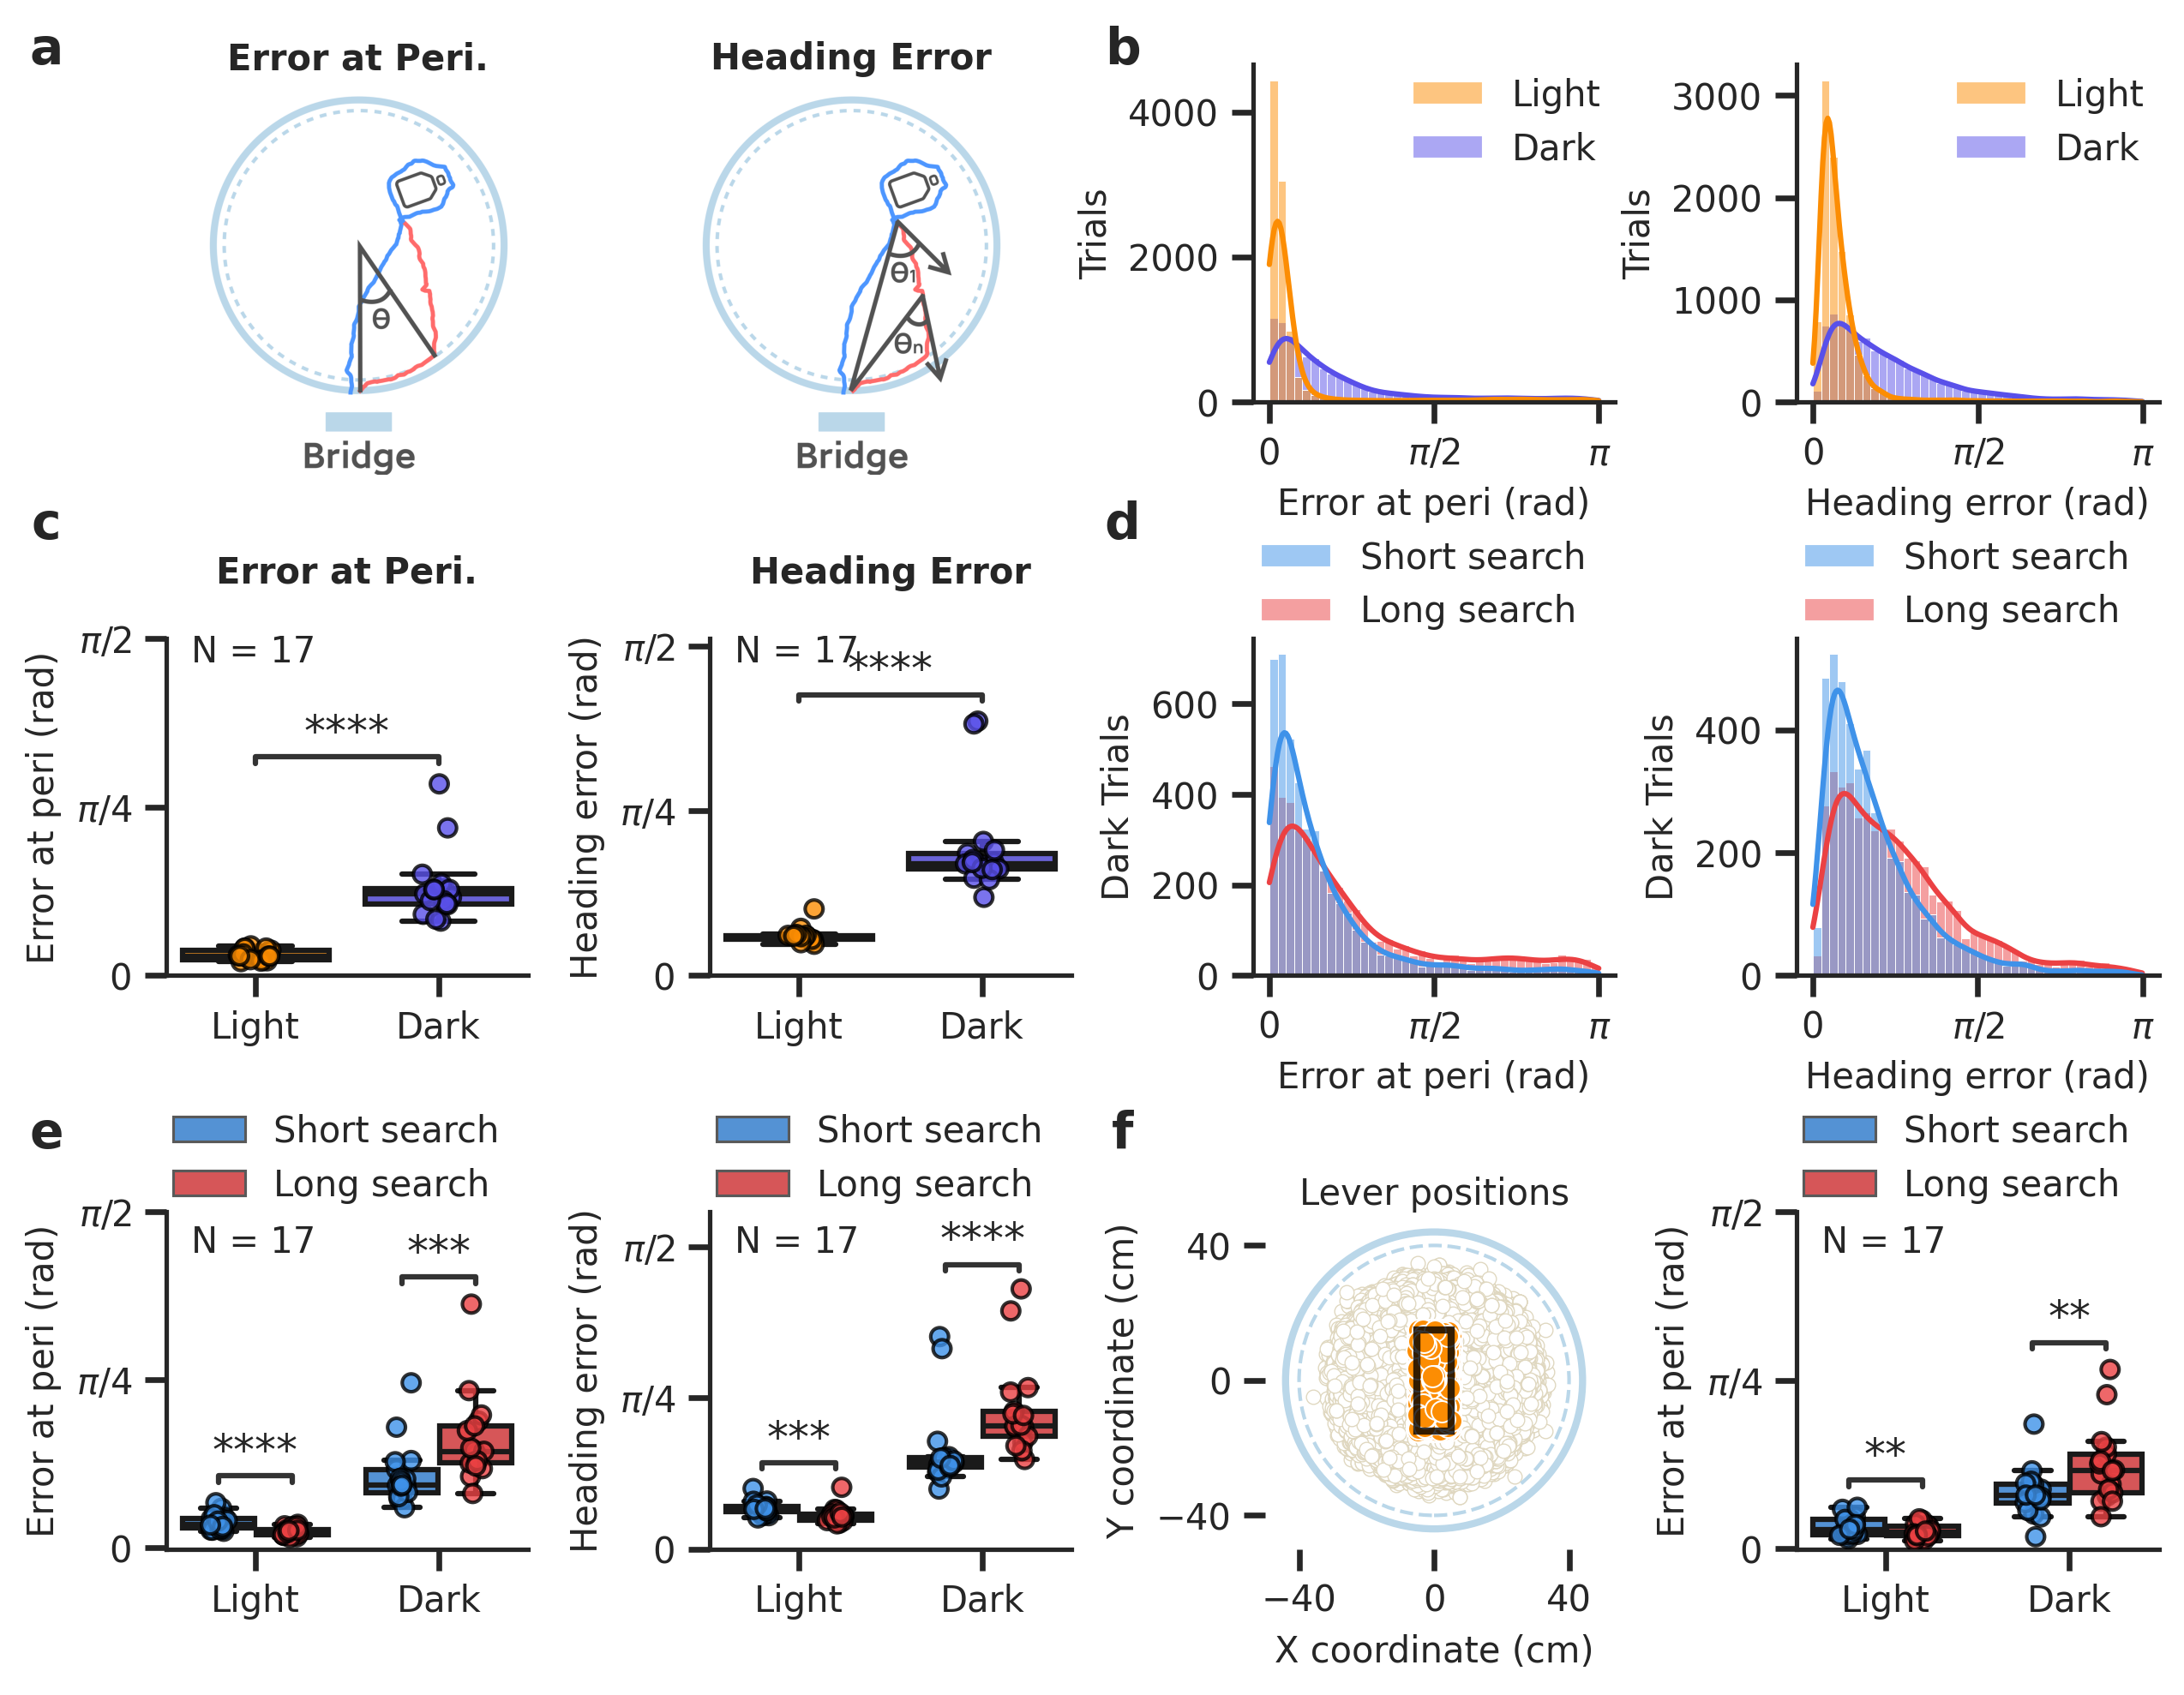

In [ ]:
nrows = 3
ncols = 4       
colSize = 2.5
rowSize = 2.5
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})

#Data Used For Making the Plot
sns.set_theme(style = 'ticks')

fig = plt.figure(figsize=(ncols*colSize, nrows*rowSize), constrained_layout=False) # create a figure
gs = GridSpec(nrows,ncols,figure = fig,wspace=0.5,hspace=0.7)
gs0 = GridSpec(nrows,ncols+1,figure = fig,width_ratios=[1]*4+[0.05],wspace=0.35)

#Add Graphical Abstract
ax0 = fig.add_subplot(gs0[0,0])
fn = myProject.dataPath + '/results/error_at_peri.png'
image_path = fn
showImage(ax0,image_path)
ax0.set_title('Error at Peri.',fontsize=GLOBALFONTSIZE,fontweight='bold')

ax0 = fig.add_subplot(gs0[0,1])

fn = myProject.dataPath + '/results/heading_error.png'
image_path = fn
showImage(ax0,image_path)
ax0.set_title('Heading Error',fontsize=GLOBALFONTSIZE,fontweight='bold')


#First Row Light Dark
ax0 = fig.add_subplot(gs[0,2])
plot_lightDark_histplot(ax0,res,xValue='homingErrorAtPeripheryLeverAbsoluteDegrees',xLabel='Error at peri (rad)')

ax0 = fig.add_subplot(gs[0,3])
plot_lightDark_histplot(ax0,res,xValue='headingError',xLabel='Heading error (rad)')

ax0 = fig.add_subplot(gs[1,0])
plot_lightDark_boxplot(ax0,res,yValue='homingErrorAtPeripheryLeverAbsoluteDegrees',xLabel='',ylabel='Error at peri (rad)', title = 'Error at Peri.')

ax0 = fig.add_subplot(gs[1,1])
plot_lightDark_boxplot(ax0,res,yValue='headingError',xLabel='',ylabel='Heading error (rad)', title = 'Heading Error')


#Second Row Long Short

ax0 = fig.add_subplot(gs[1,2])
plot_longShort_histplot(ax0,res,lightCondition='dark',xValue='homingErrorAtPeripheryLeverAbsoluteDegrees',xLabel='Error at peri (rad)',ylabel='Dark Trials')

ax0 = fig.add_subplot(gs[1,3])
plot_longShort_histplot(ax0,res,lightCondition='dark',xValue='headingError',xLabel='Heading error (rad)',ylabel='Dark Trials')

ax0 = fig.add_subplot(gs[2,0])
plot_longShort_boxplot(ax0,res,yValue='homingErrorAtPeripheryLeverAbsoluteDegrees',xLabel='',ylabel='Error at peri (rad)')

ax0 = fig.add_subplot(gs[2,1])
plot_longShort_boxplot(ax0,res,yValue='headingError',xLabel='',ylabel='Heading error (rad)')


errorName = 'homingErrorAtPeripheryLeverAbsoluteDegrees'
ylabelAll = 'Error at peri (rad)'

########################
resS = res.copy()
resS = resS[np.sqrt((resS.leverX)**2+(resS.leverY)**2)<40]

#selecting based on lever position
resP = res[(res.leverX.abs()<5)&(res.leverY.abs()<15)]

#Add the homing Paths
ax0 = fig.add_subplot(gs[2,2])

scatter_lever_position_all_points(ax0,resS)
scatter_lever_position(ax0,resP,lc='Lever positions')

draw_circle(ax0)
draw_circle(ax0,r=40,lw=1,ls='dashed')
draw_rectangle(ax0,center=(0,0),width=10,height=30,lw=2)


#Stats Plot
ax0 = fig.add_subplot(gs[2,3])
plot_longShort_boxplot(ax0,resP,yValue=errorName,xLabel='',ylabel=ylabelAll) 

###################################



#***********************************#
ax0 = fig.add_subplot(gs[:,:])

FirstRowX = -0.06
SecondRowX = 0.23
ThirdRowX = 0.48

FirstRowY = 1.01
SecondRowY = 0.69
ThirdRowY = 0.28

#Add figure legend
add_text(ax0,FirstRowX,FirstRowY,'a',fw='900')
add_text(ax0,ThirdRowX,FirstRowY,'b',fw='900')

add_text(ax0,FirstRowX,SecondRowY,'c',fw='900')
add_text(ax0,ThirdRowX,SecondRowY,'d',fw='900')

add_text(ax0,FirstRowX,ThirdRowY,'e',fw='900')
add_text(ax0,ThirdRowX,ThirdRowY,'f',fw='900')

ax0.axis('off')

#***********************************#

plt.savefig('../../Output/Ext_Figure2.jpg', bbox_inches='tight', dpi=300)

# Ext_Fig_3

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

dark_Left vs. dark_Right: Wilcoxon test (paired samples), P_val:3.052e-05 Stat=1.000e+00
light_Left vs. light_Right: Wilcoxon test (paired samples), P_val:1.526e-05 Stat=0.000e+00
WilcoxonResult(statistic=0.0, pvalue=1.52587890625e-05)


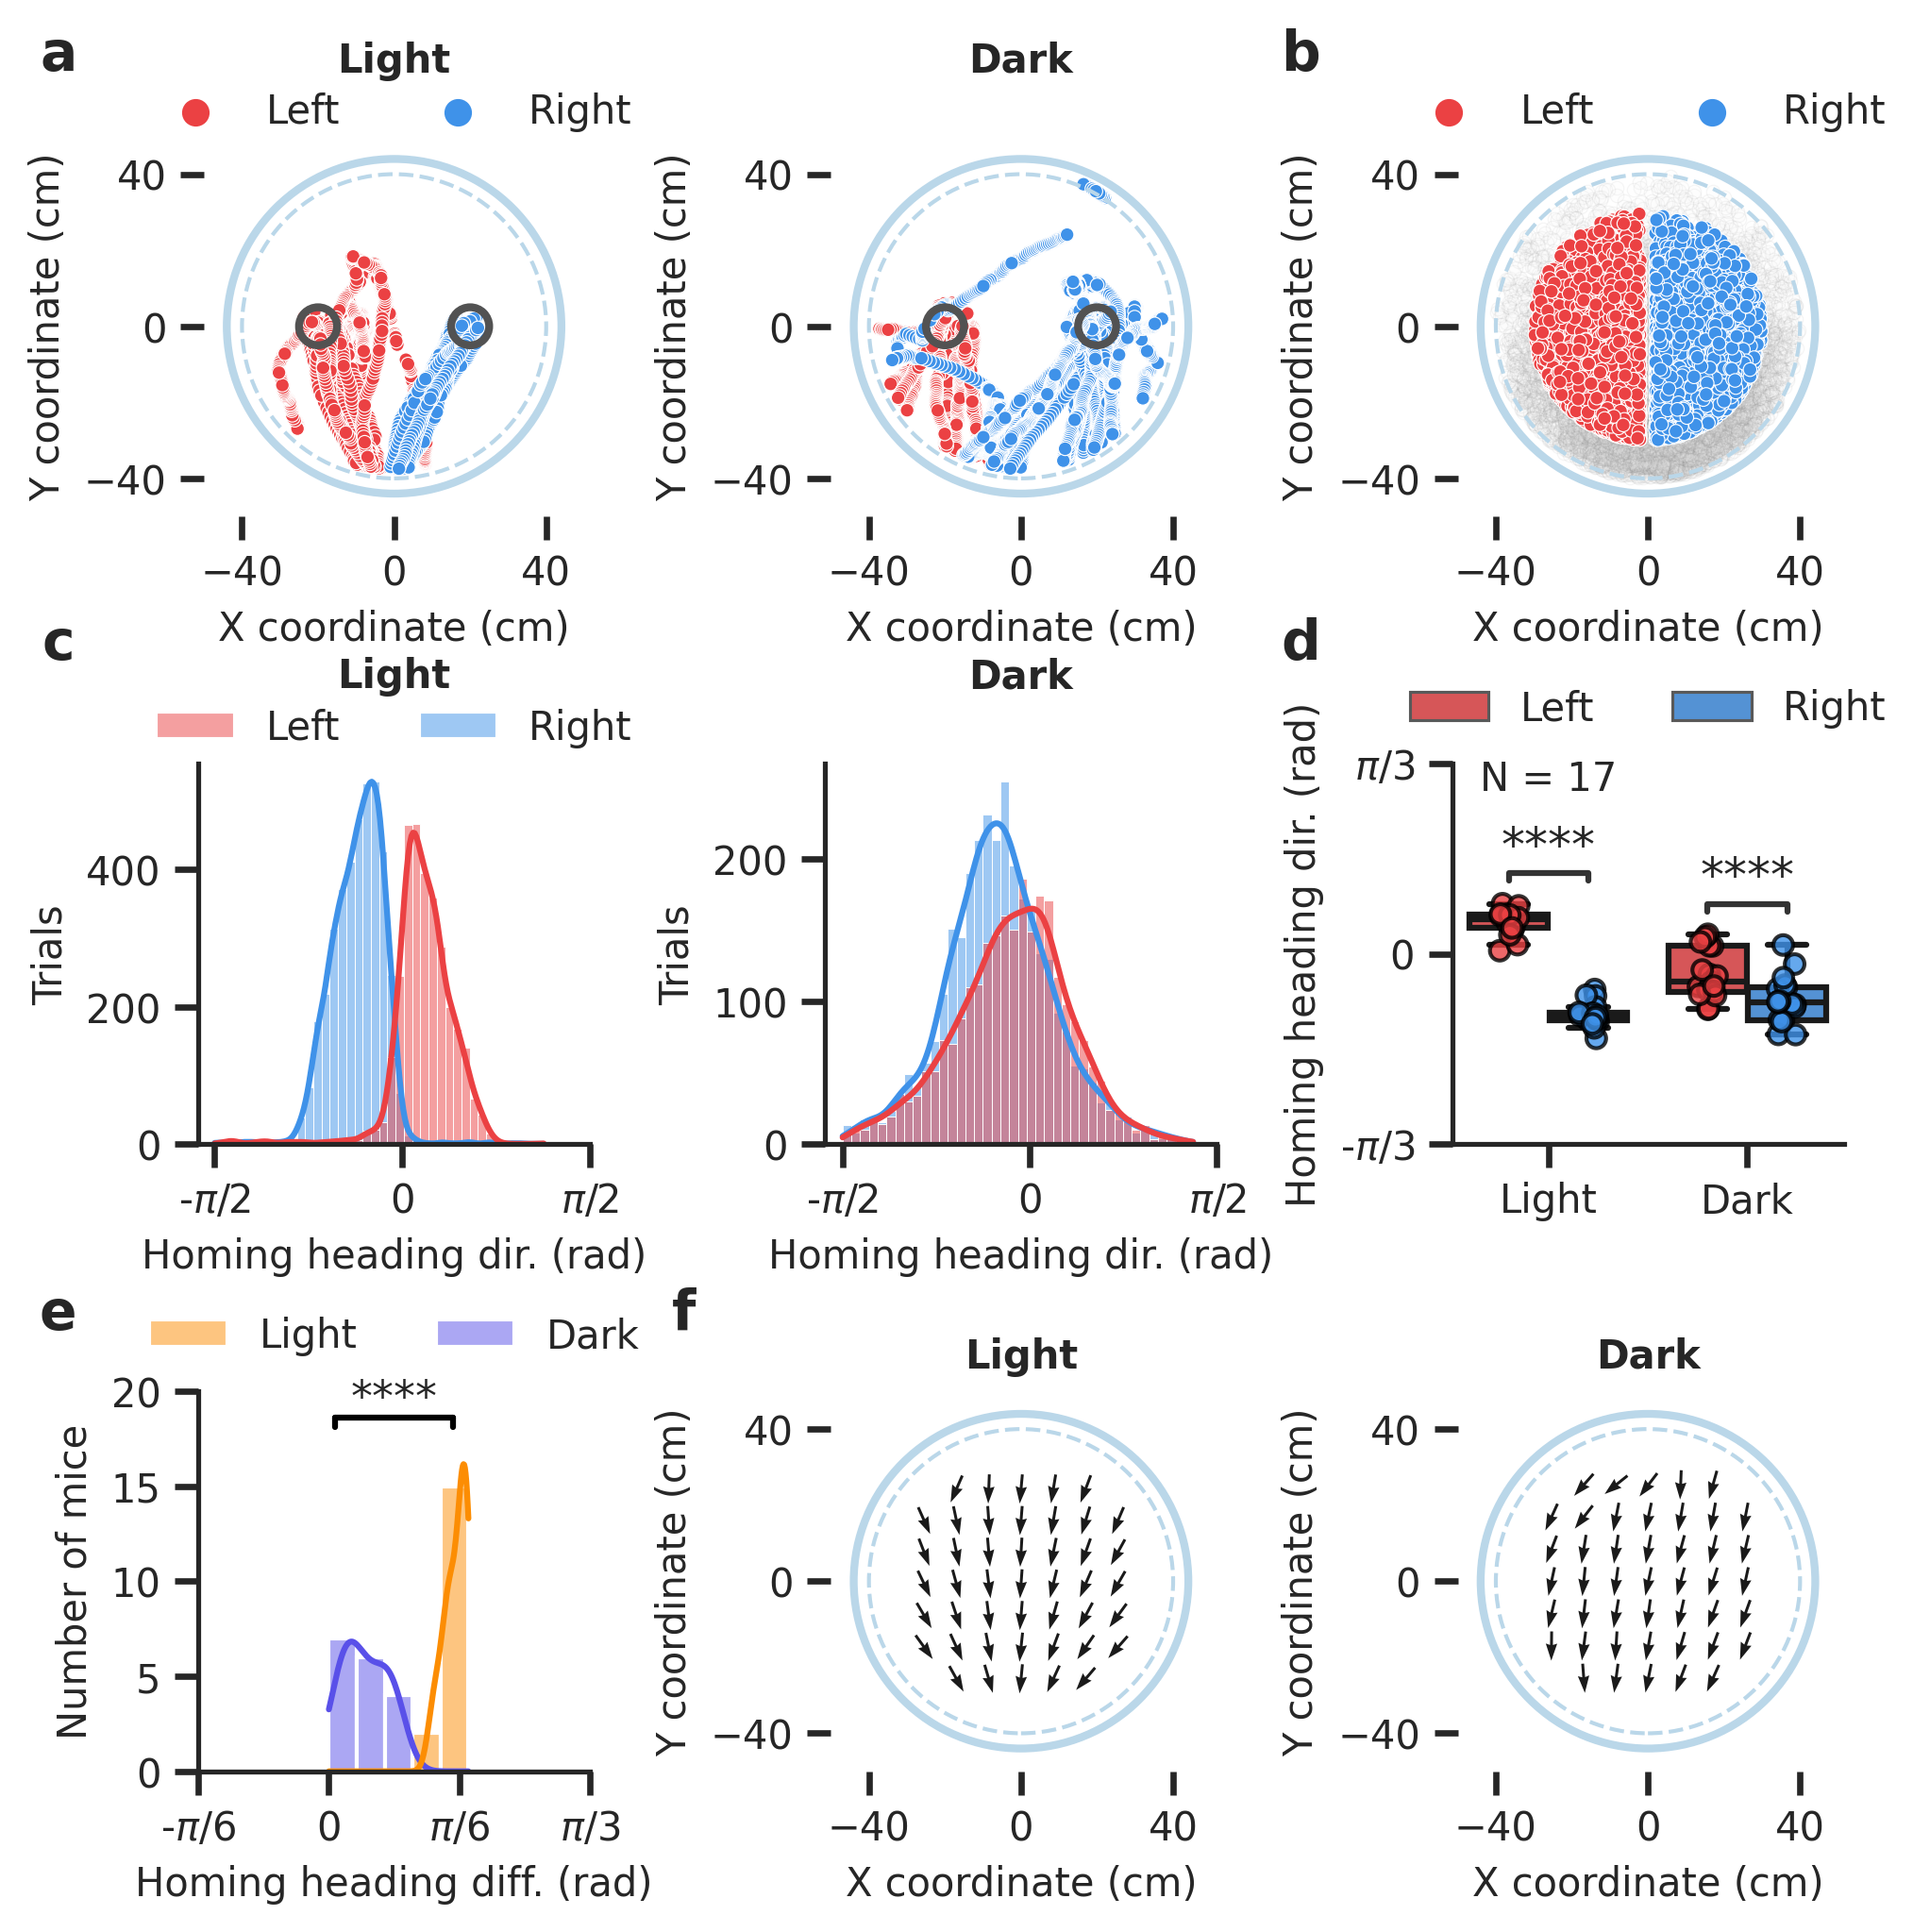

In [ ]:
nrows = 3
ncols = 3
colSize = 2.5
rowSize = 2.5
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})

#Data Used For Making the Plot
sns.set_theme(style = 'ticks')

fig = plt.figure(figsize=(ncols*colSize, nrows*rowSize), constrained_layout=False) # create a figure
gs = GridSpec(nrows,ncols,figure = fig,wspace=0.6,hspace=0.65)



m='jp452'
i=0

inDf = res[res.subject == m]
makePlots(inDf,gs,fig,instanDf,i,m)

#Data Used For Making the Plot
resS = res.copy()
resS = resS[np.sqrt((resS.startPositionHoming_x)**2+(resS.startPositionHoming_y)**2)<40]
resP = resS[np.sqrt((resS.startPositionHoming_x)**2+(resS.startPositionHoming_y)**2)<30]
resP = resP[(resP.startPositionHoming_x.abs()>2)]

resP = resP.dropna(subset='startPositionHoming_x')
###################################

#Add the homing Paths
ax0 = fig.add_subplot(gs[0,2])
resSL = resS
resPL = resP

scatter_homing_start_position_all_points(ax0,resSL)
scatter_homing_start_position(ax0,resPL,lc='')

draw_circle(ax0)
draw_circle(ax0,r=40,lw=1,ls='dashed')


ax0 = fig.add_subplot(gs[1,0])
resP['medianMVDeviationRoomReference'] = resP['medianMVDeviationRoomReference']+90
plot_leftRight_histplot(ax0,resP,lightCondition='light'
                        ,xValue='medianMVDeviationRoomReference',title='Light',ylabel='Trials')

ax0 = fig.add_subplot(gs[1,1])
plot_leftRight_histplot(ax0,resP,lightCondition='dark'
                        ,xValue='medianMVDeviationRoomReference',title='Dark',ylabel='Trials',legend=False)

ax0 = fig.add_subplot(gs[1,2])
plot_leftRight_boxplot(ax0,resP,yValue='medianMVDeviationRoomReference',xLabel='',ylabel='Homing heading dir. (rad)')



#Third Row

#Add the difference histplot
ax0 = fig.add_subplot(gs[2,0])

#Plot the histogram
resP = resS[np.sqrt((resS.startPositionHoming_x)**2+(resS.startPositionHoming_y)**2)<30]
resP = resP[(resP.startPositionHoming_x.abs()>2)]
resP['medianMVDeviationRoomReference'] = resP['medianMVDeviationRoomReference']+90
plot_leftRight_difference_histplot(ax0,resP,xValue='medianMVDeviationRoomReference',ylabel='Number of mice')


#Add arrow plot
ax0 = fig.add_subplot(gs[2,1])
resP = resS[np.sqrt((resS.startPositionHoming_x)**2+(resS.startPositionHoming_y)**2)<30]
resP = resP[(resP.startPositionHoming_x.abs()>2)]
draw_circle(ax0)
draw_circle(ax0,r=40,lw=1,ls='dashed')

plot_arrow_map(ax0,resP[resP.light=='light'],lc=f'Light')

ax0 = fig.add_subplot(gs[2,2])
resP = resS[np.sqrt((resS.startPositionHoming_x)**2+(resS.startPositionHoming_y)**2)<30]
resP = resP[(resP.startPositionHoming_x.abs()>2)]
draw_circle(ax0)
draw_circle(ax0,r=40,lw=1,ls='dashed')

plot_arrow_map(ax0,resP[resP.light=='dark'],lc=f'Dark')


#Add Letters
ax0 = fig.add_subplot(gs[:,:])

FirstRowX = -0.085
SecondRowX = 0.295
ThirdRowX = 0.67

FirstRowY = 1.05
SecondRowY = 0.69
ThirdRowY = 0.28

#Add figure legend
add_text(ax0,FirstRowX,FirstRowY,'a',fw='900')
add_text(ax0,ThirdRowX,FirstRowY,'b',fw='900')

add_text(ax0,FirstRowX,SecondRowY,'c',fw='900')
add_text(ax0,ThirdRowX,SecondRowY,'d',fw='900')

add_text(ax0,FirstRowX,ThirdRowY,'e',fw='900')
add_text(ax0,SecondRowX,ThirdRowY,'f',fw='900')

ax0.axis('off')

plt.savefig('../../Output/Ext_Figure3.jpg', bbox_inches='tight', dpi=300)